In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':70}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
dfes = pd.read_csv('../Maysville_multi_quan.csv')
dfes['FID_RiverRd_AOI'] = np.where(dfes['NWI']=='wetland', 1, 0)
#dfes['NWI'] = np.where(dfes['NWI']=='wetland', 'wetland', 'nonwetland')


In [7]:
def vplt(columnName):
    fig, ax = plt.subplots(3, 2, figsize=(12,12))
    sns.violinplot(x="NWI", y=f"{columnName}_MIN", data=dfes, ax=ax[0,0])
    sns.violinplot(x="NWI", y=f"{columnName}_MAX", data=dfes, ax=ax[0,1])
    sns.violinplot(x="NWI", y=f"{columnName}_MEAN", data=dfes, ax=ax[1,0])
    sns.violinplot(x="NWI", y=f"{columnName}_STD", data=dfes, ax=ax[1,1])
    sns.violinplot(x="NWI", y=f"{columnName}_RANGE", data=dfes, ax=ax[2,0])
    sns.violinplot(x="NWI", y=f"{columnName}_MEDIAN", data=dfes, ax=ax[2,1])
    fig.suptitle(f"{columnName} Distribution Plot")
    return fig

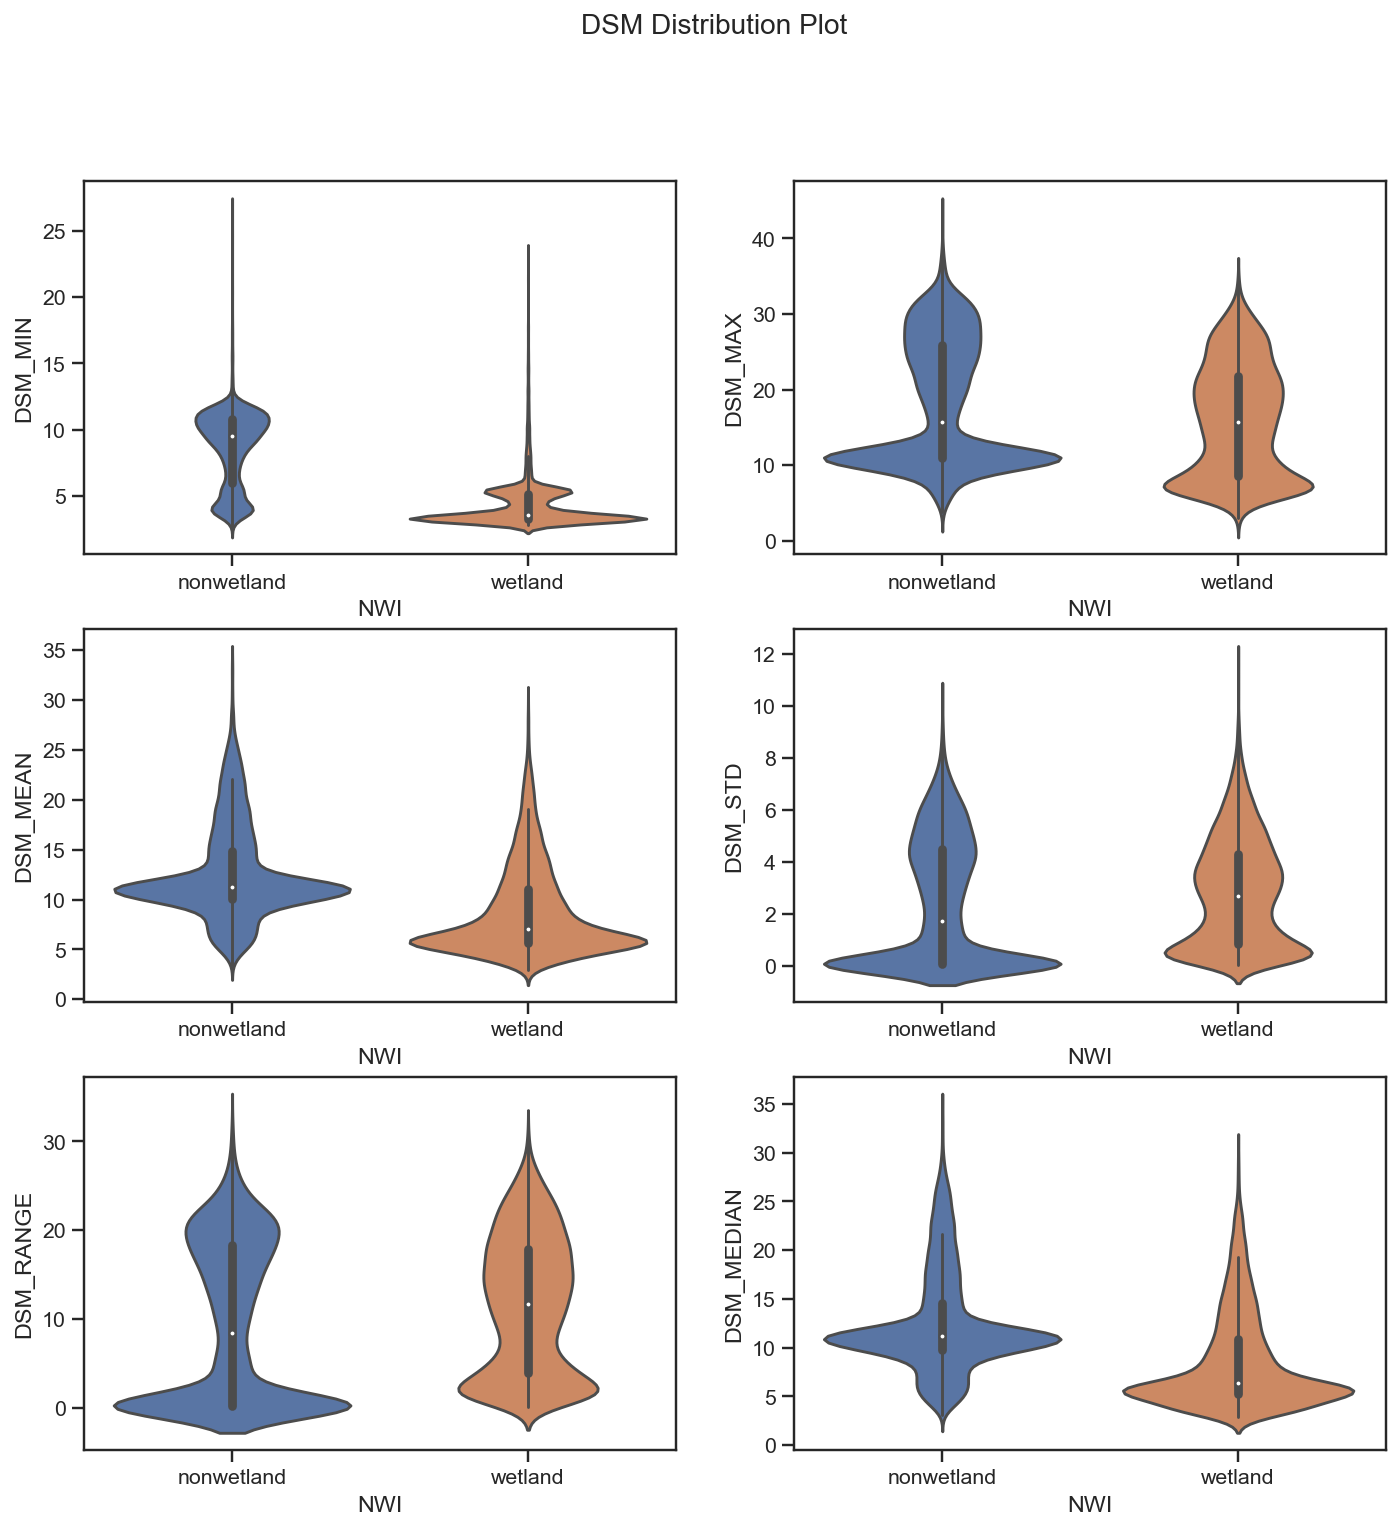

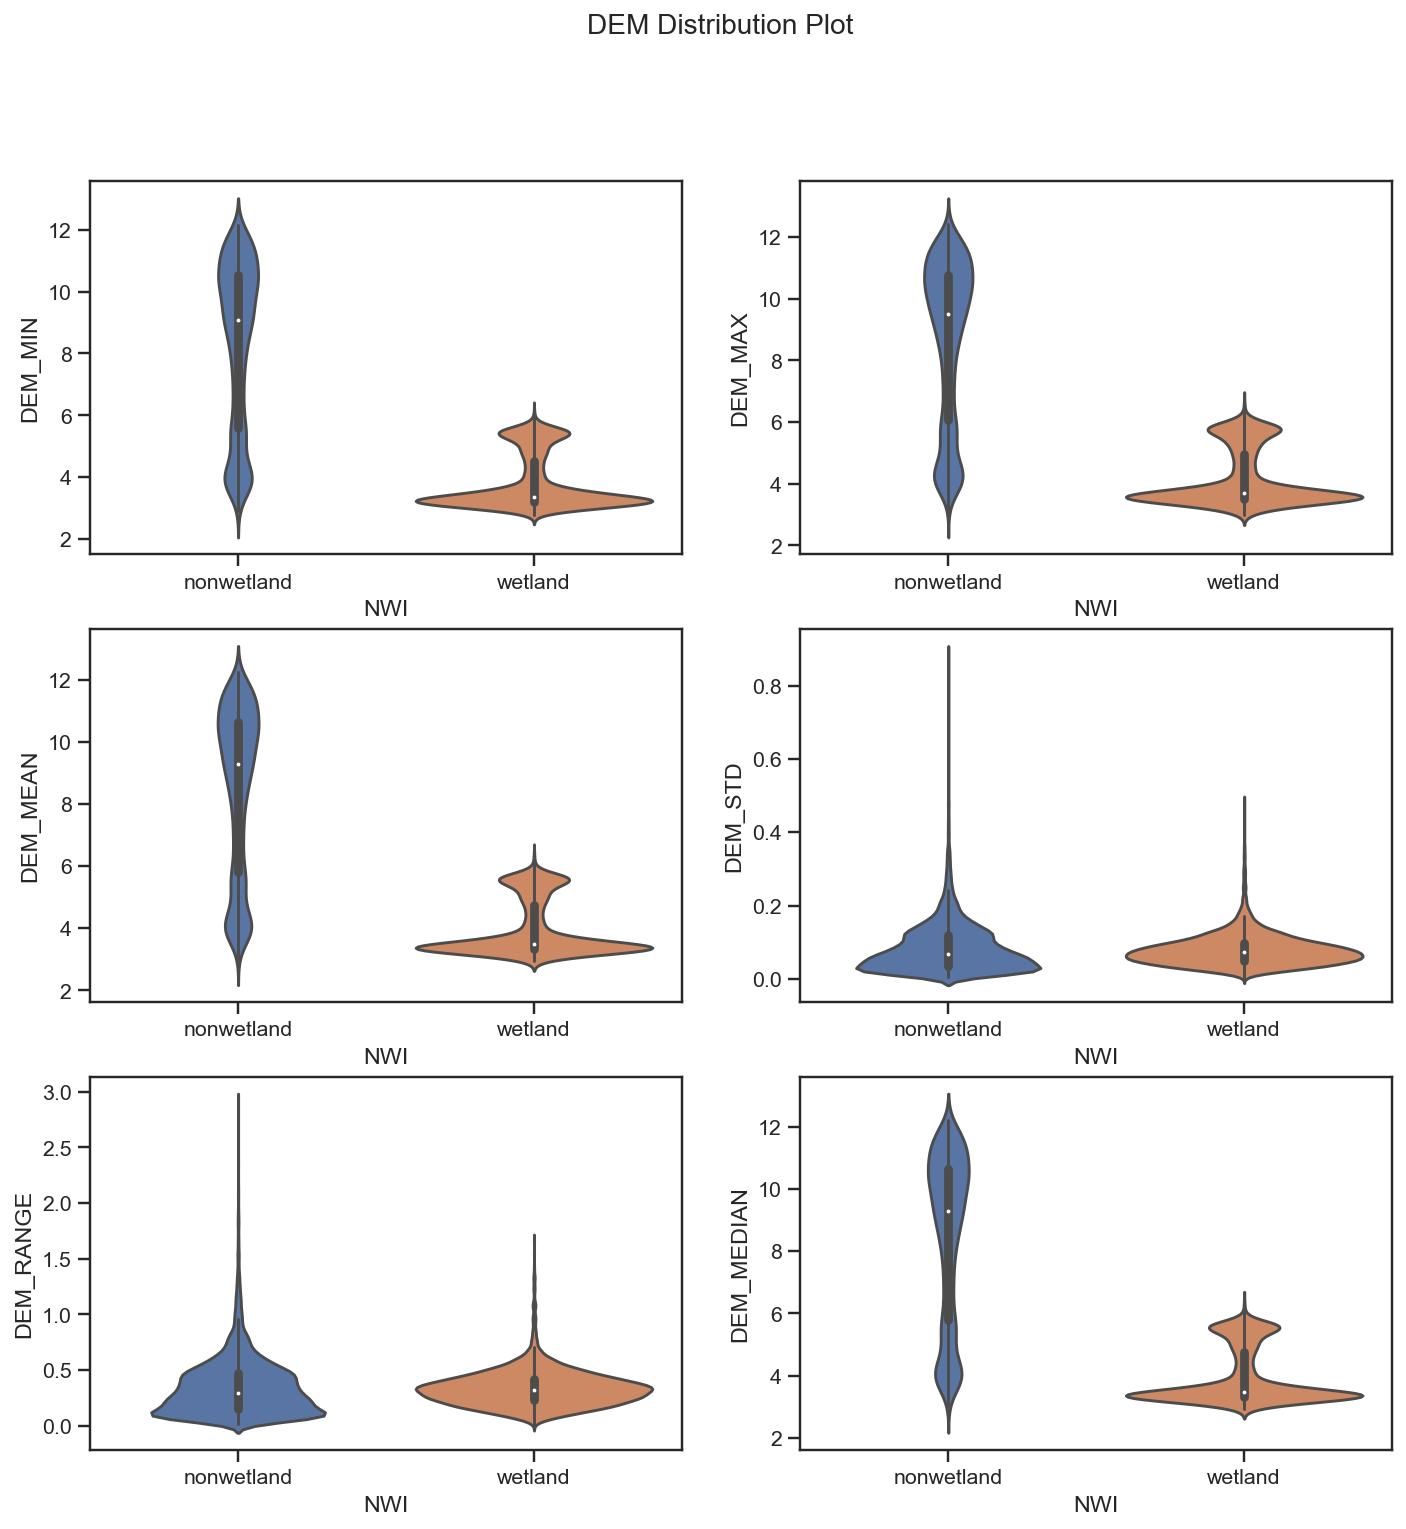

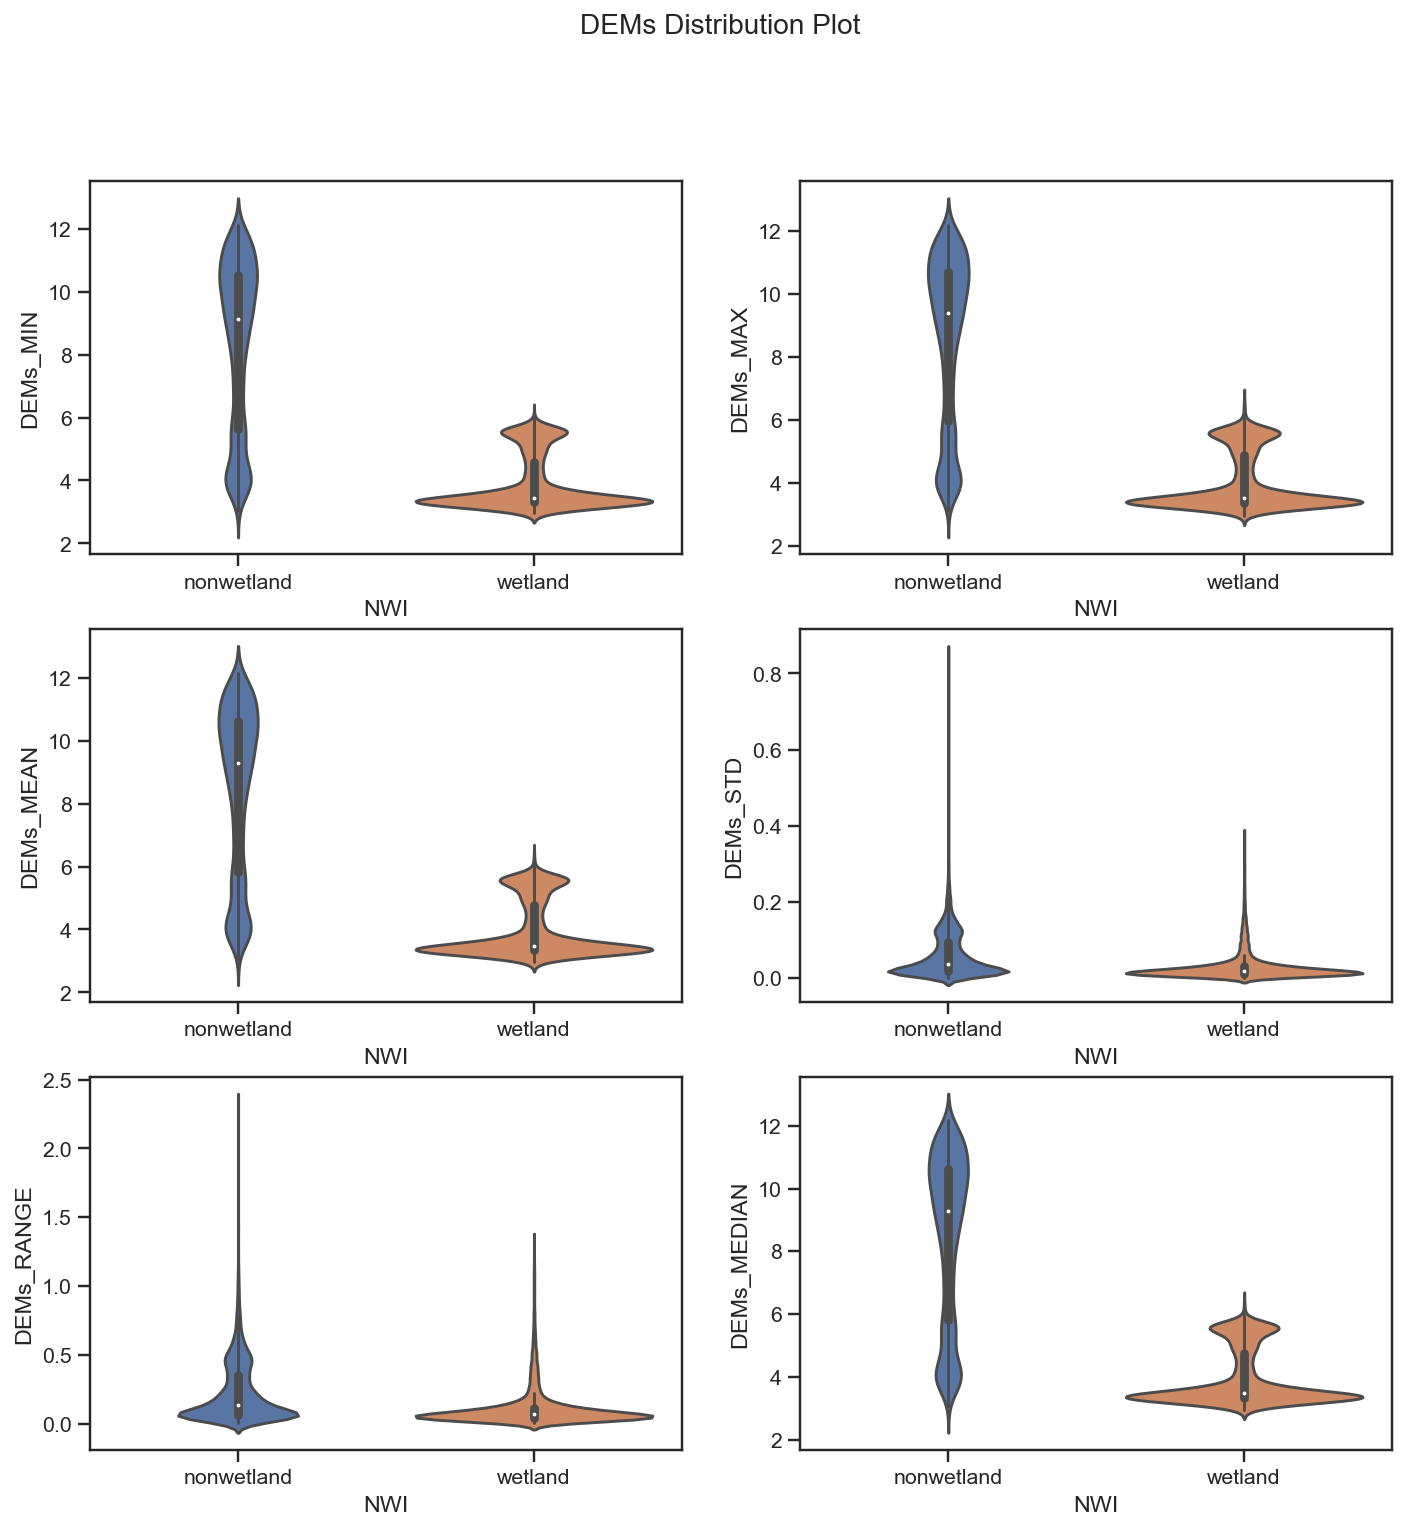

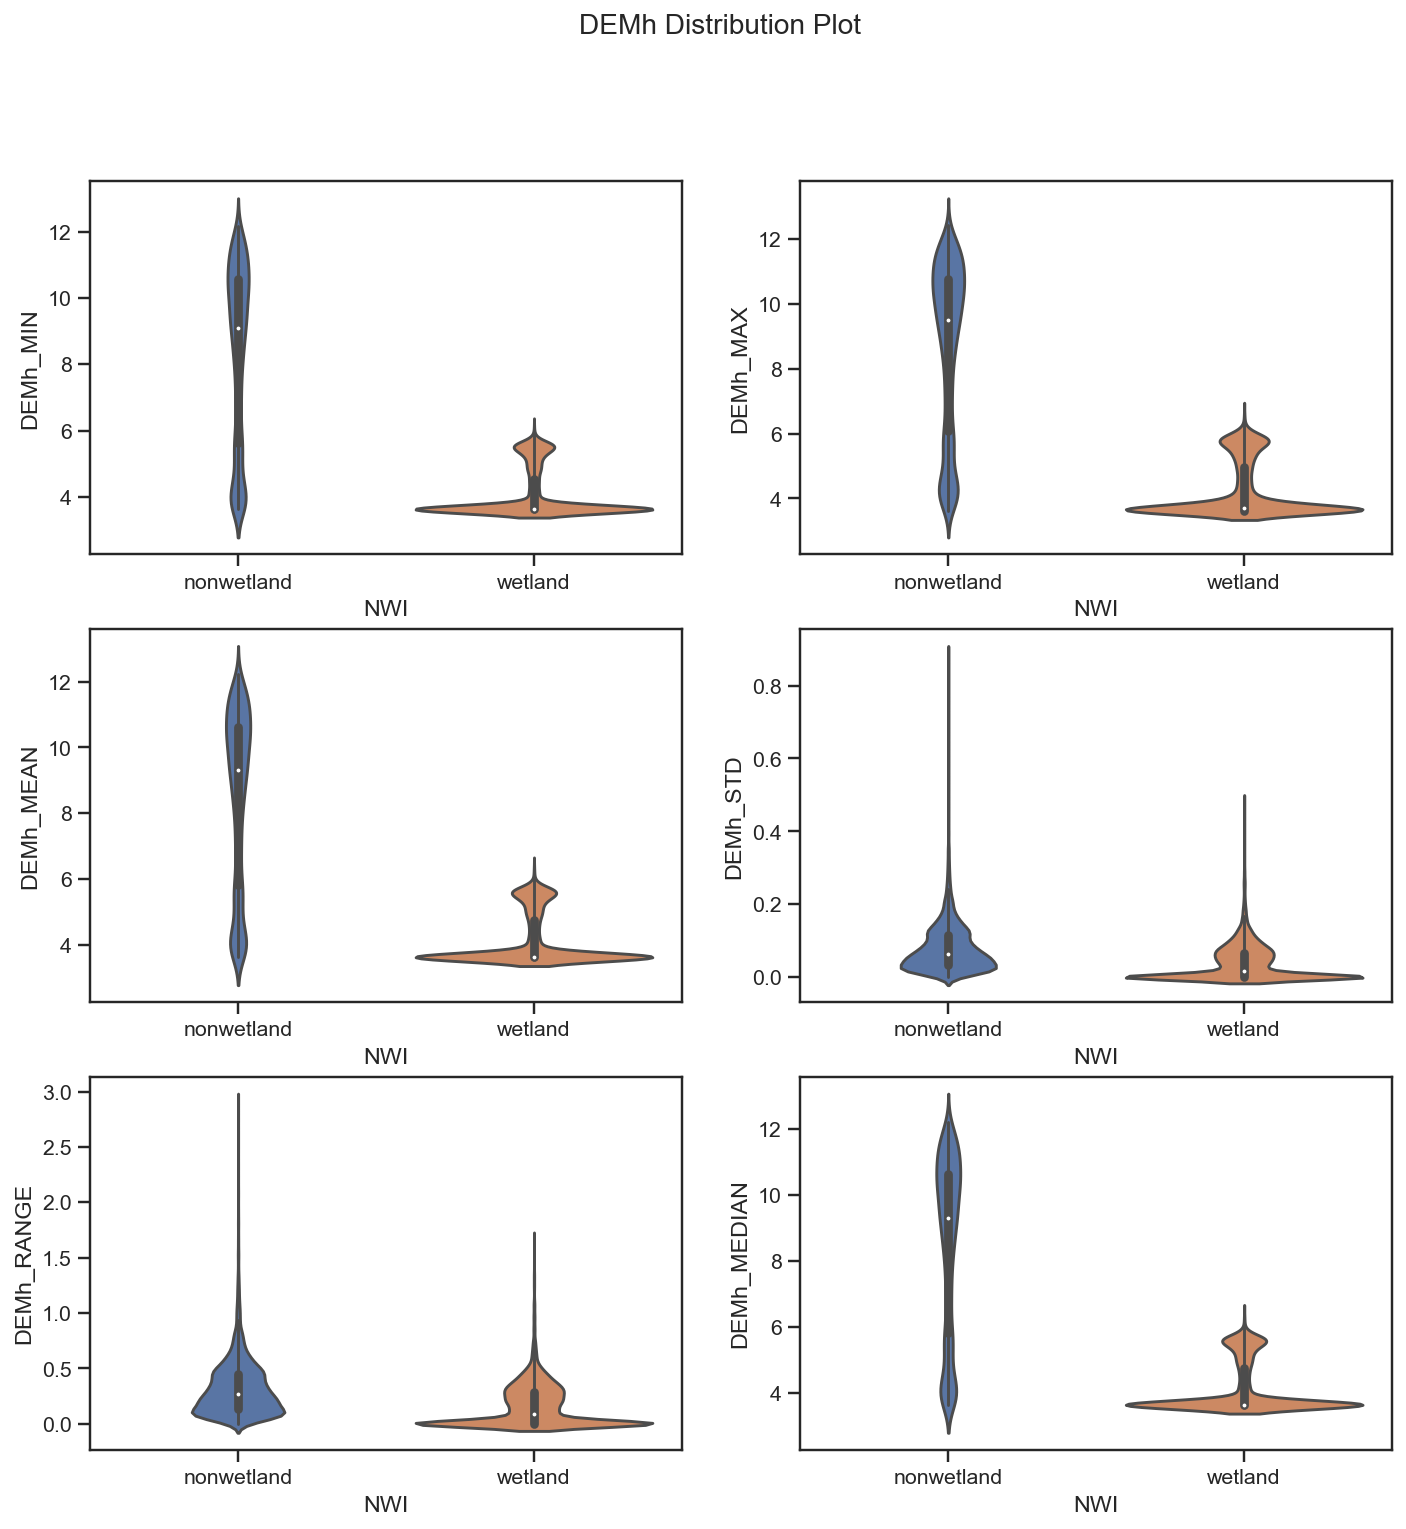

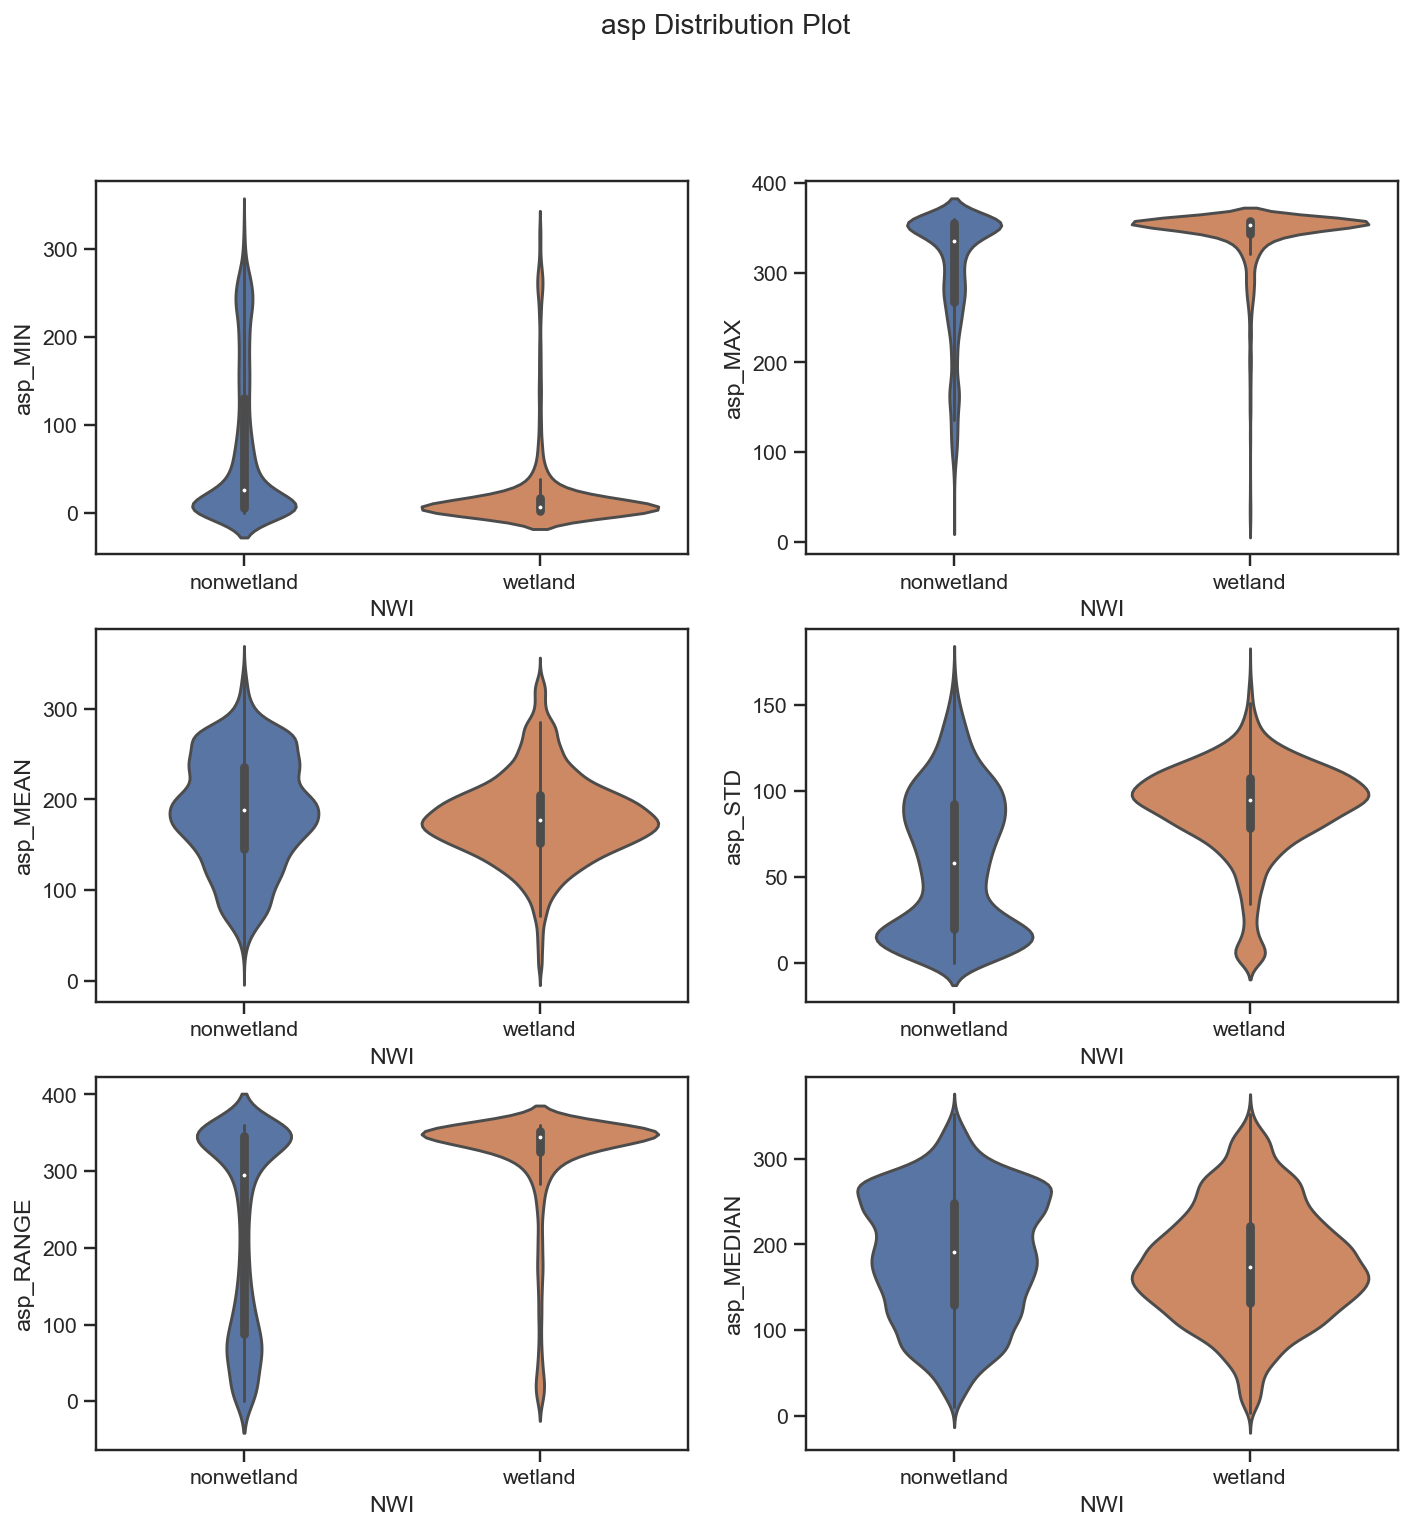

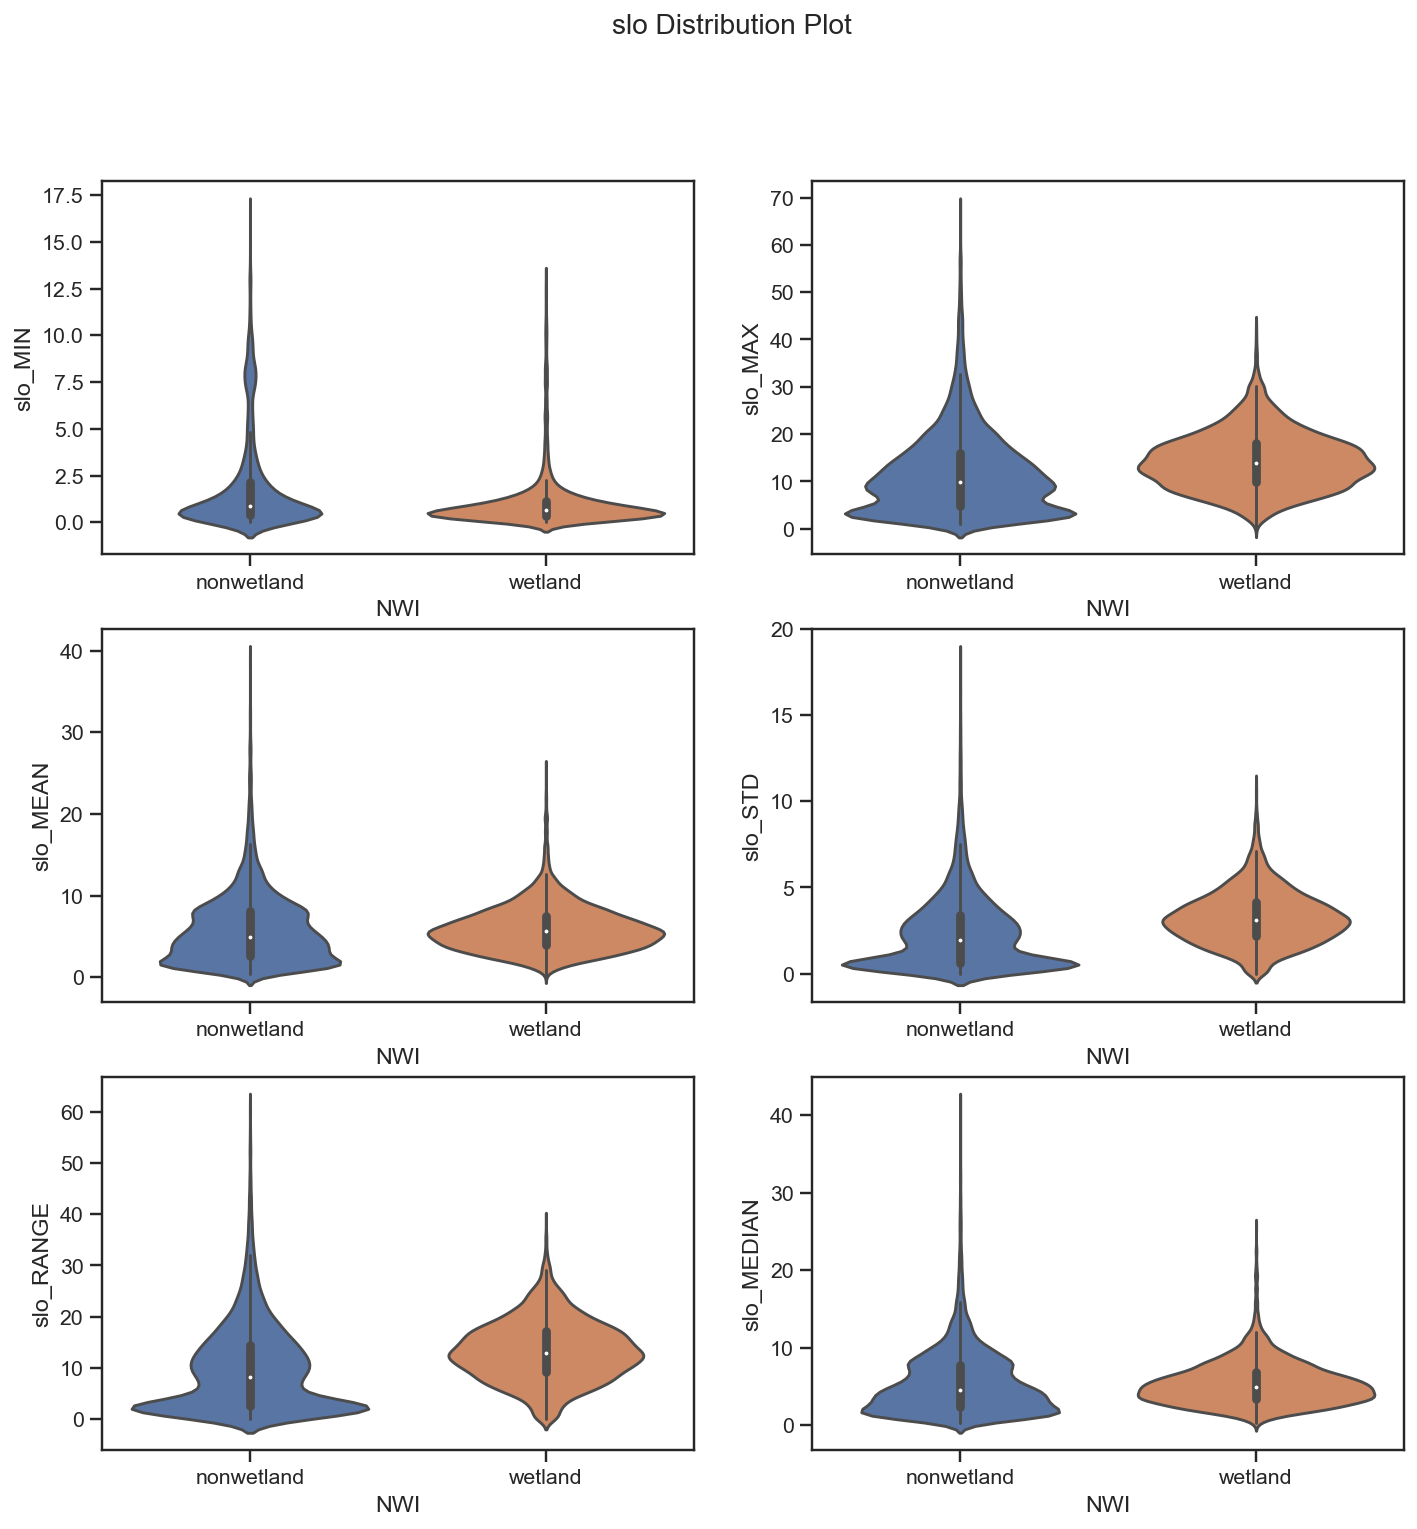

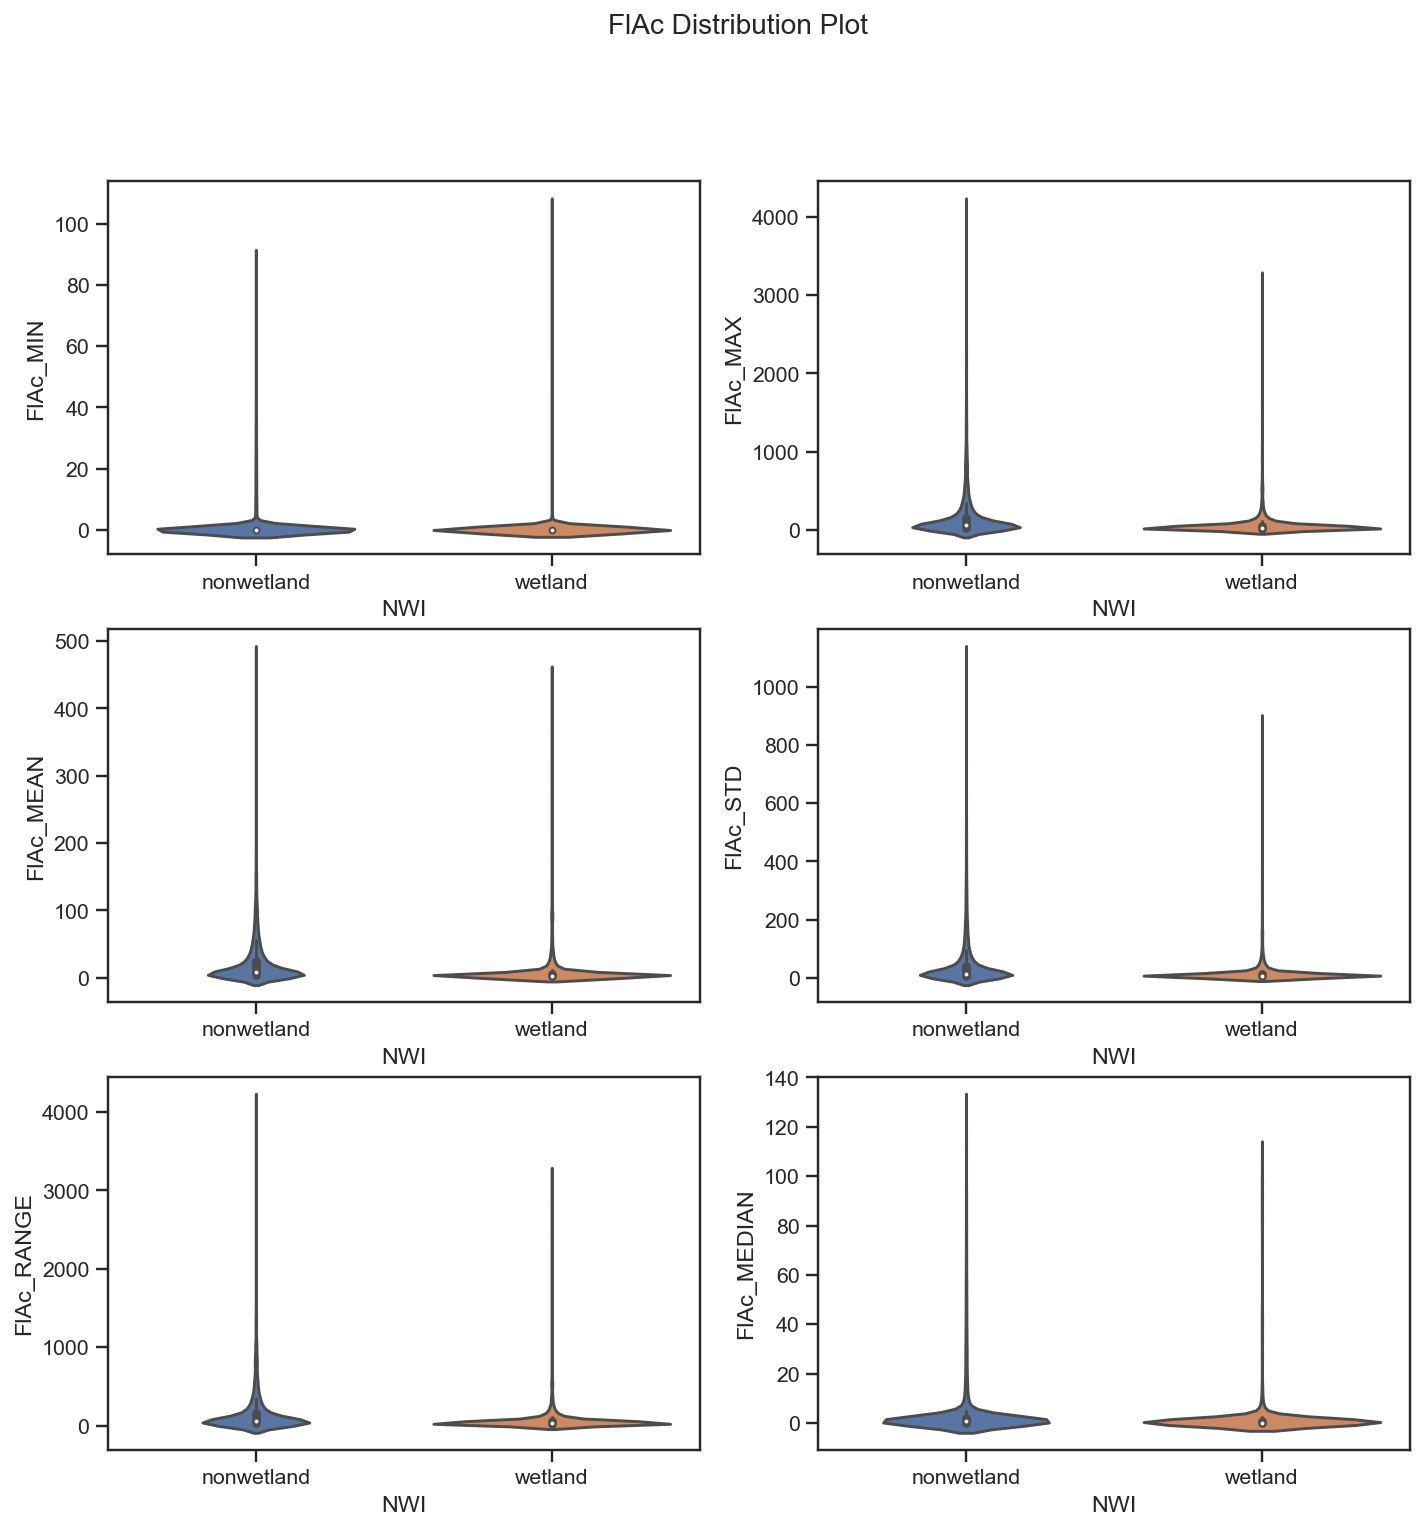

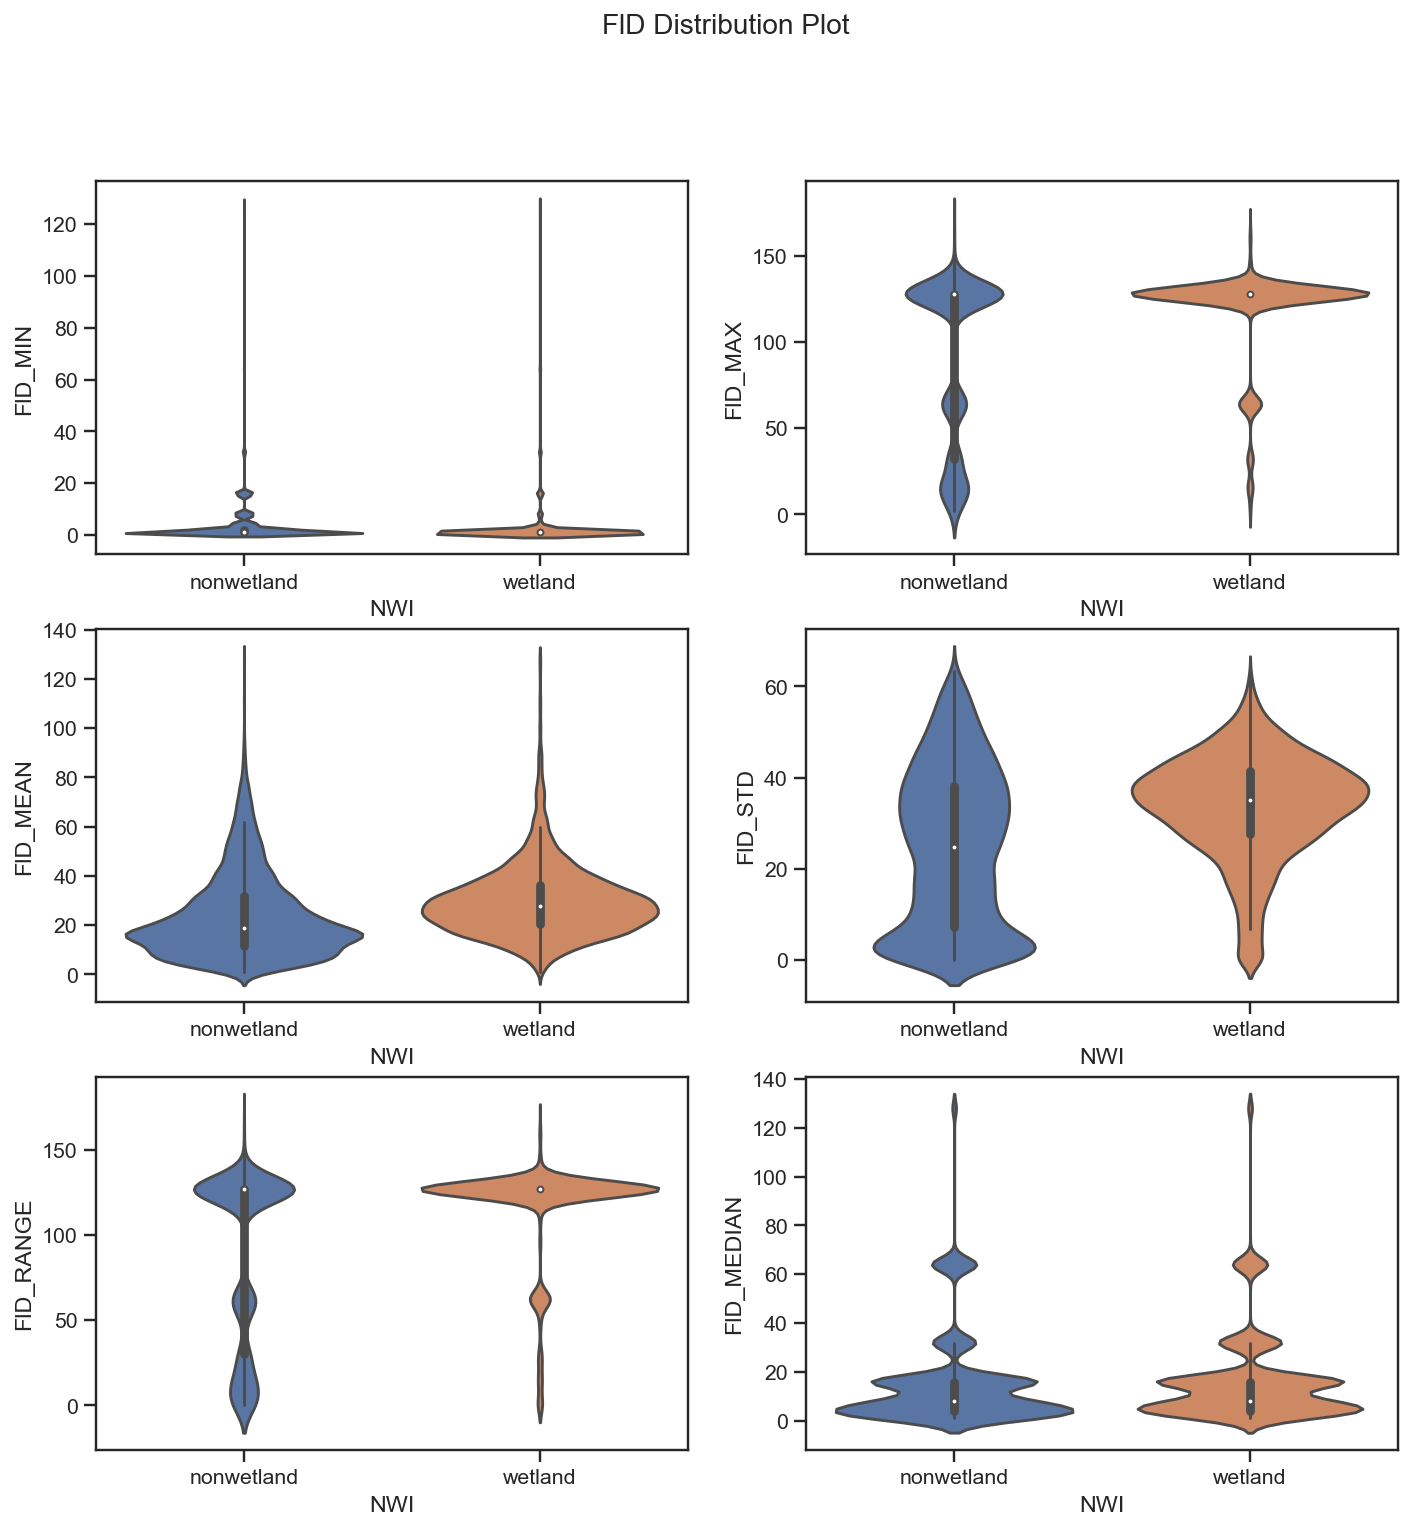

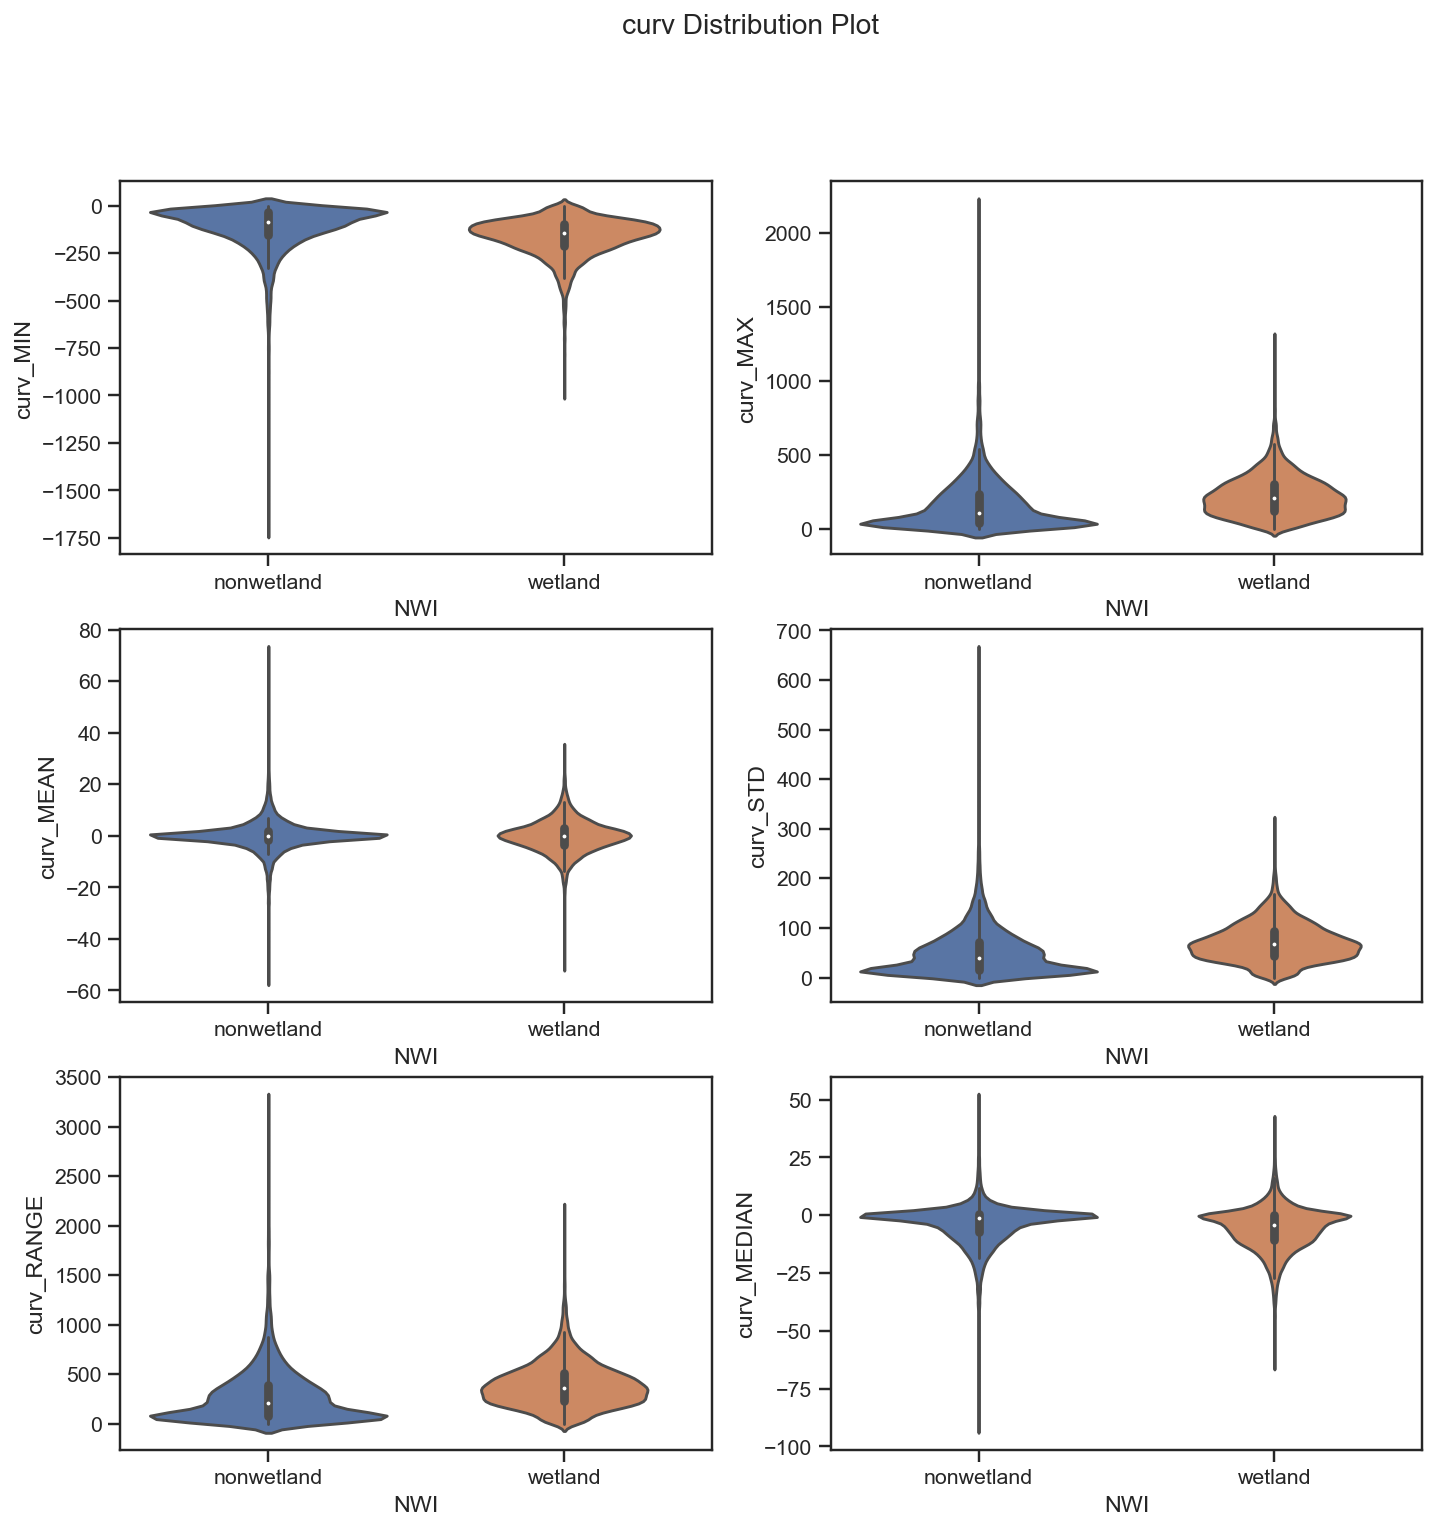

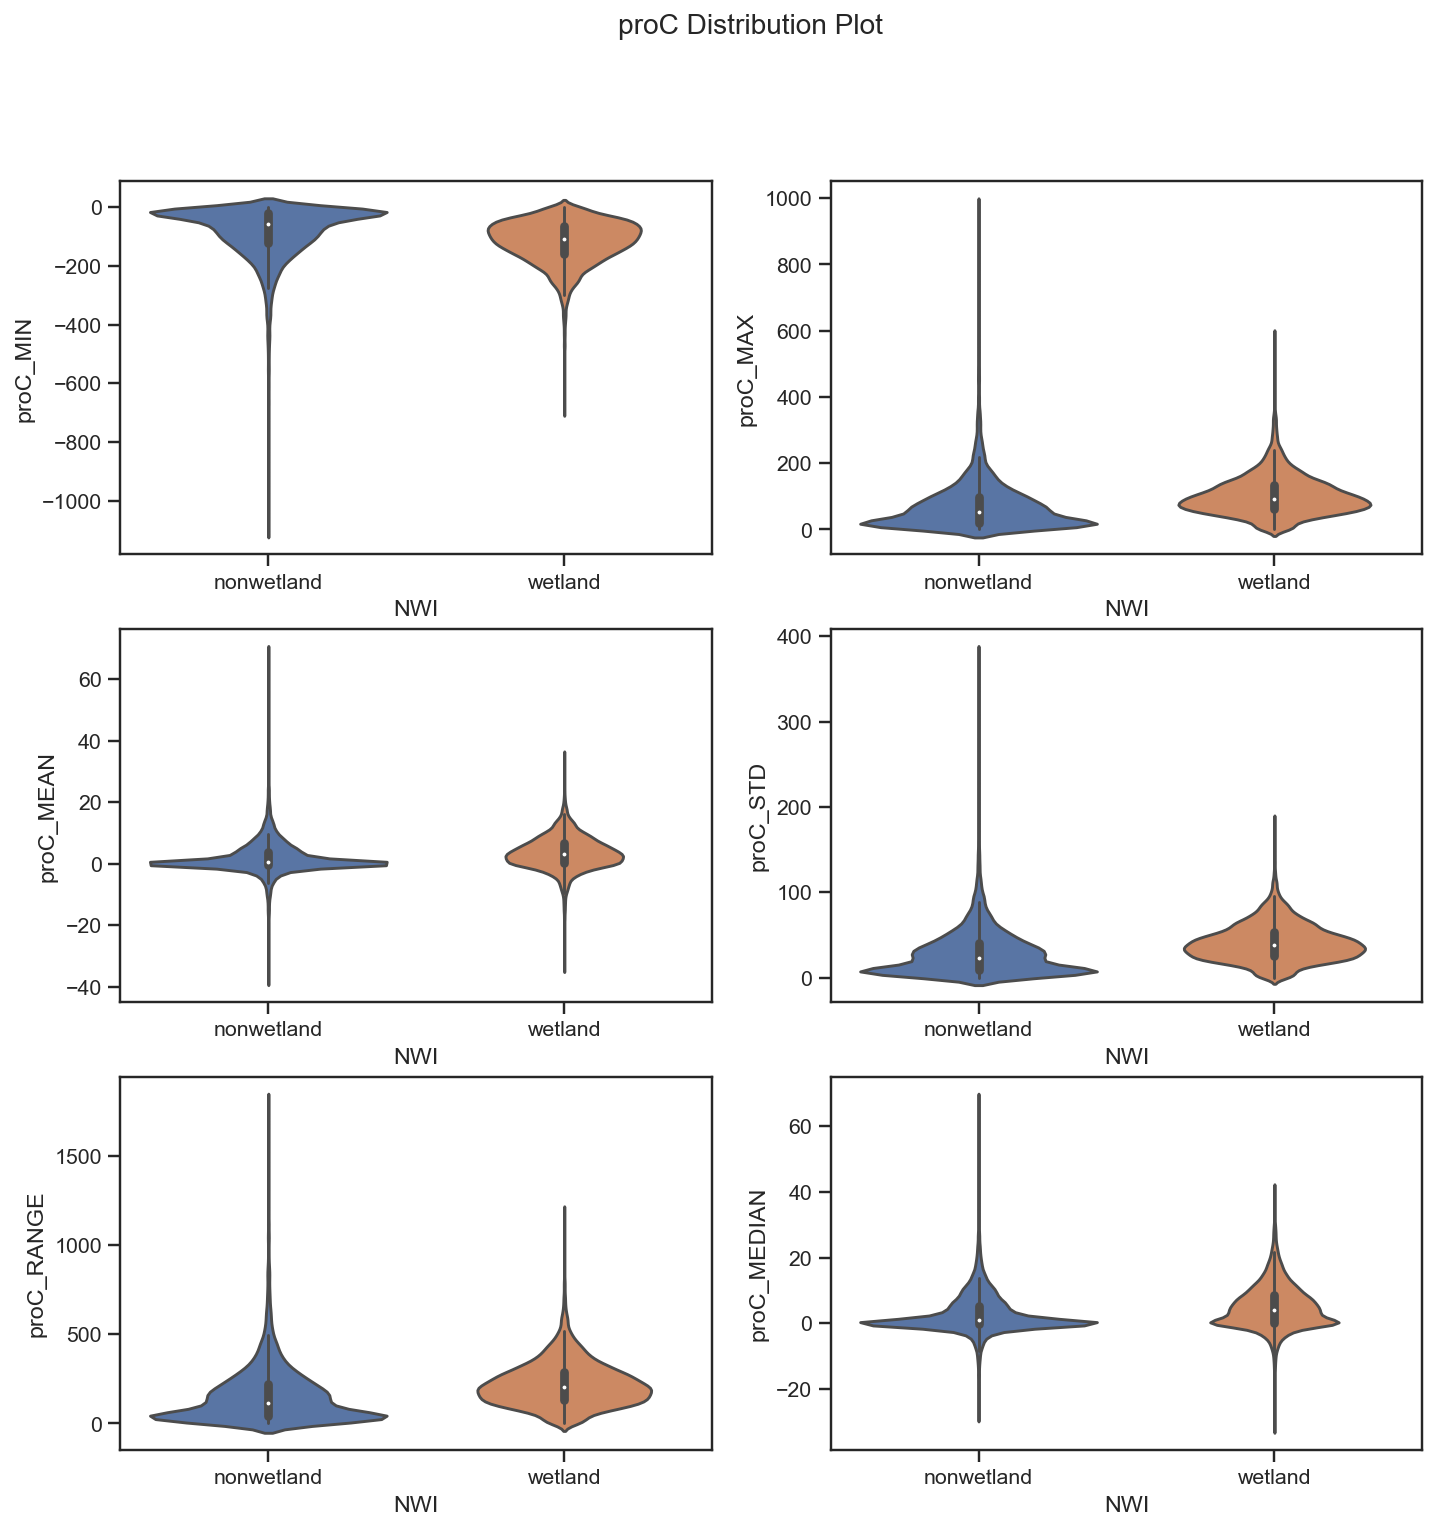

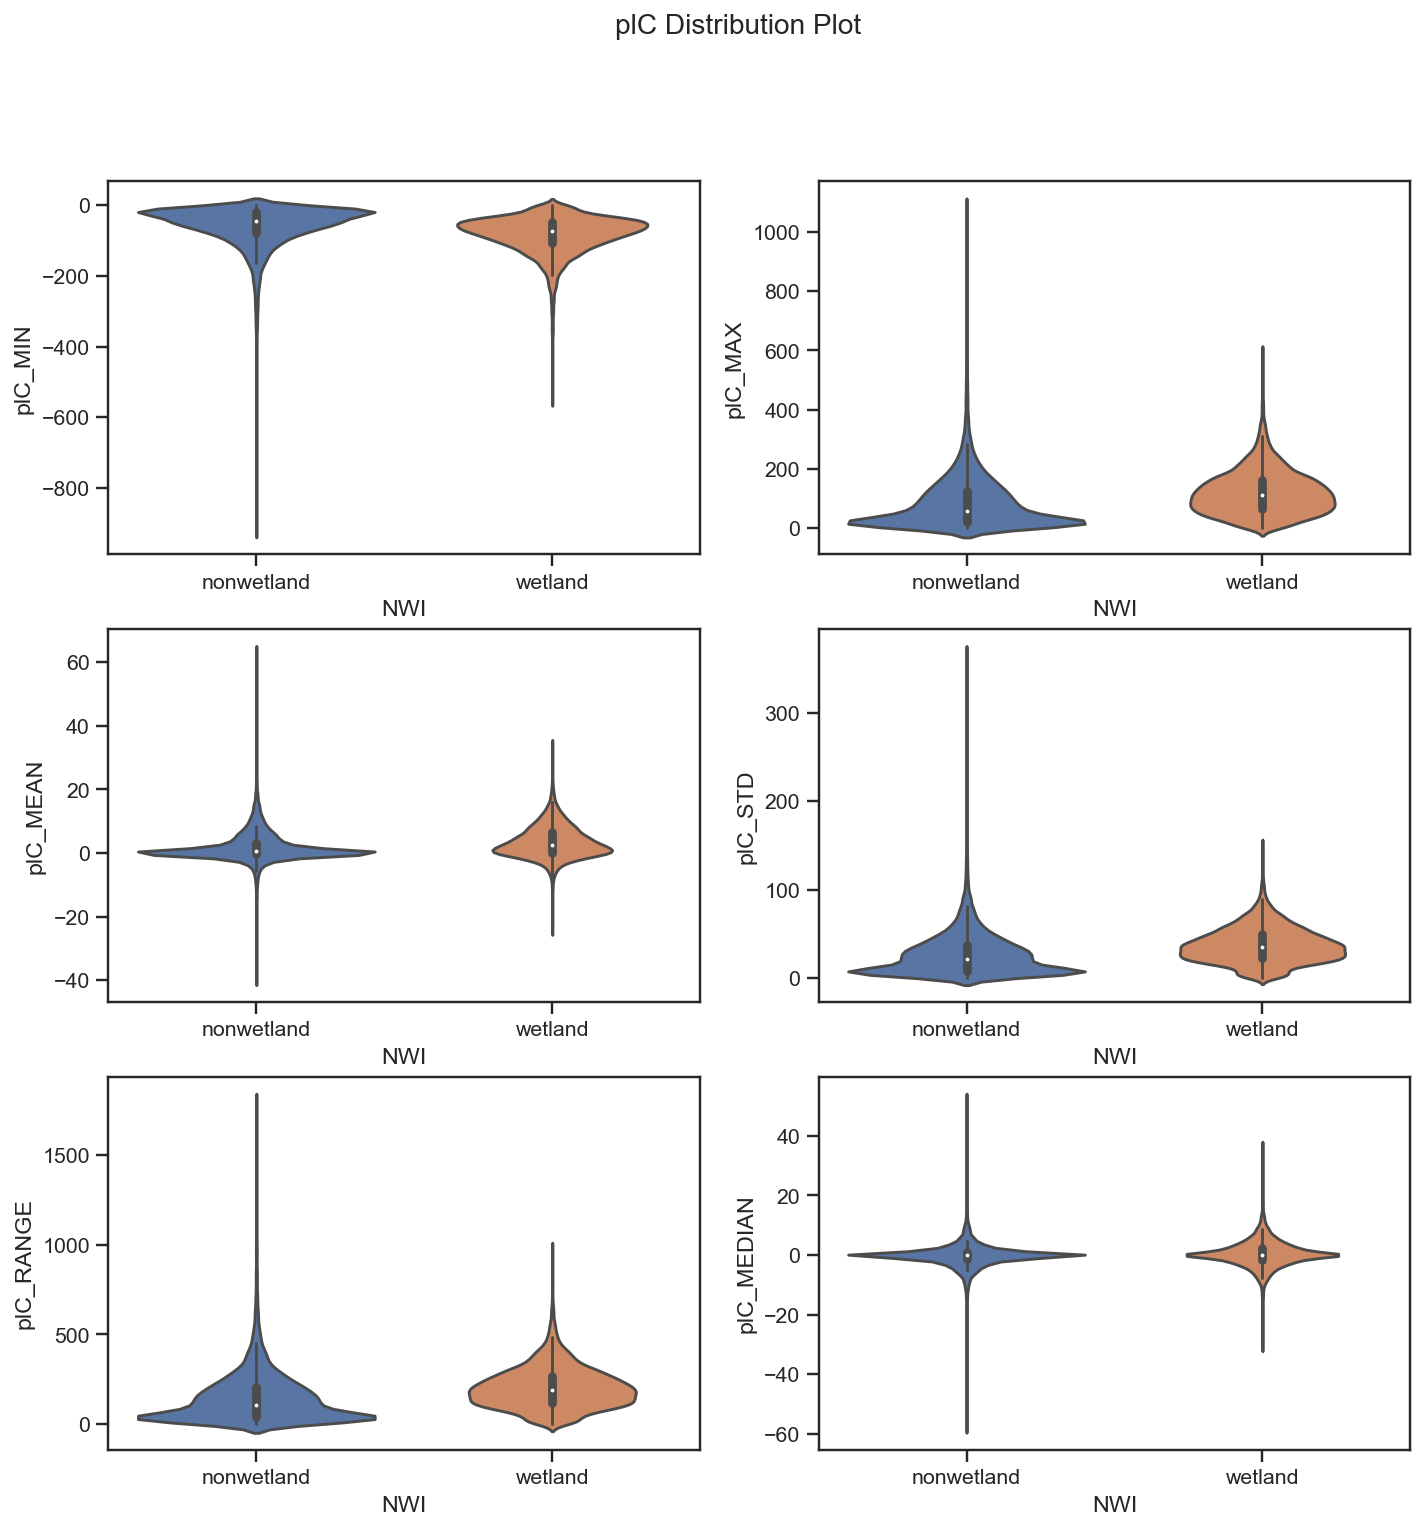

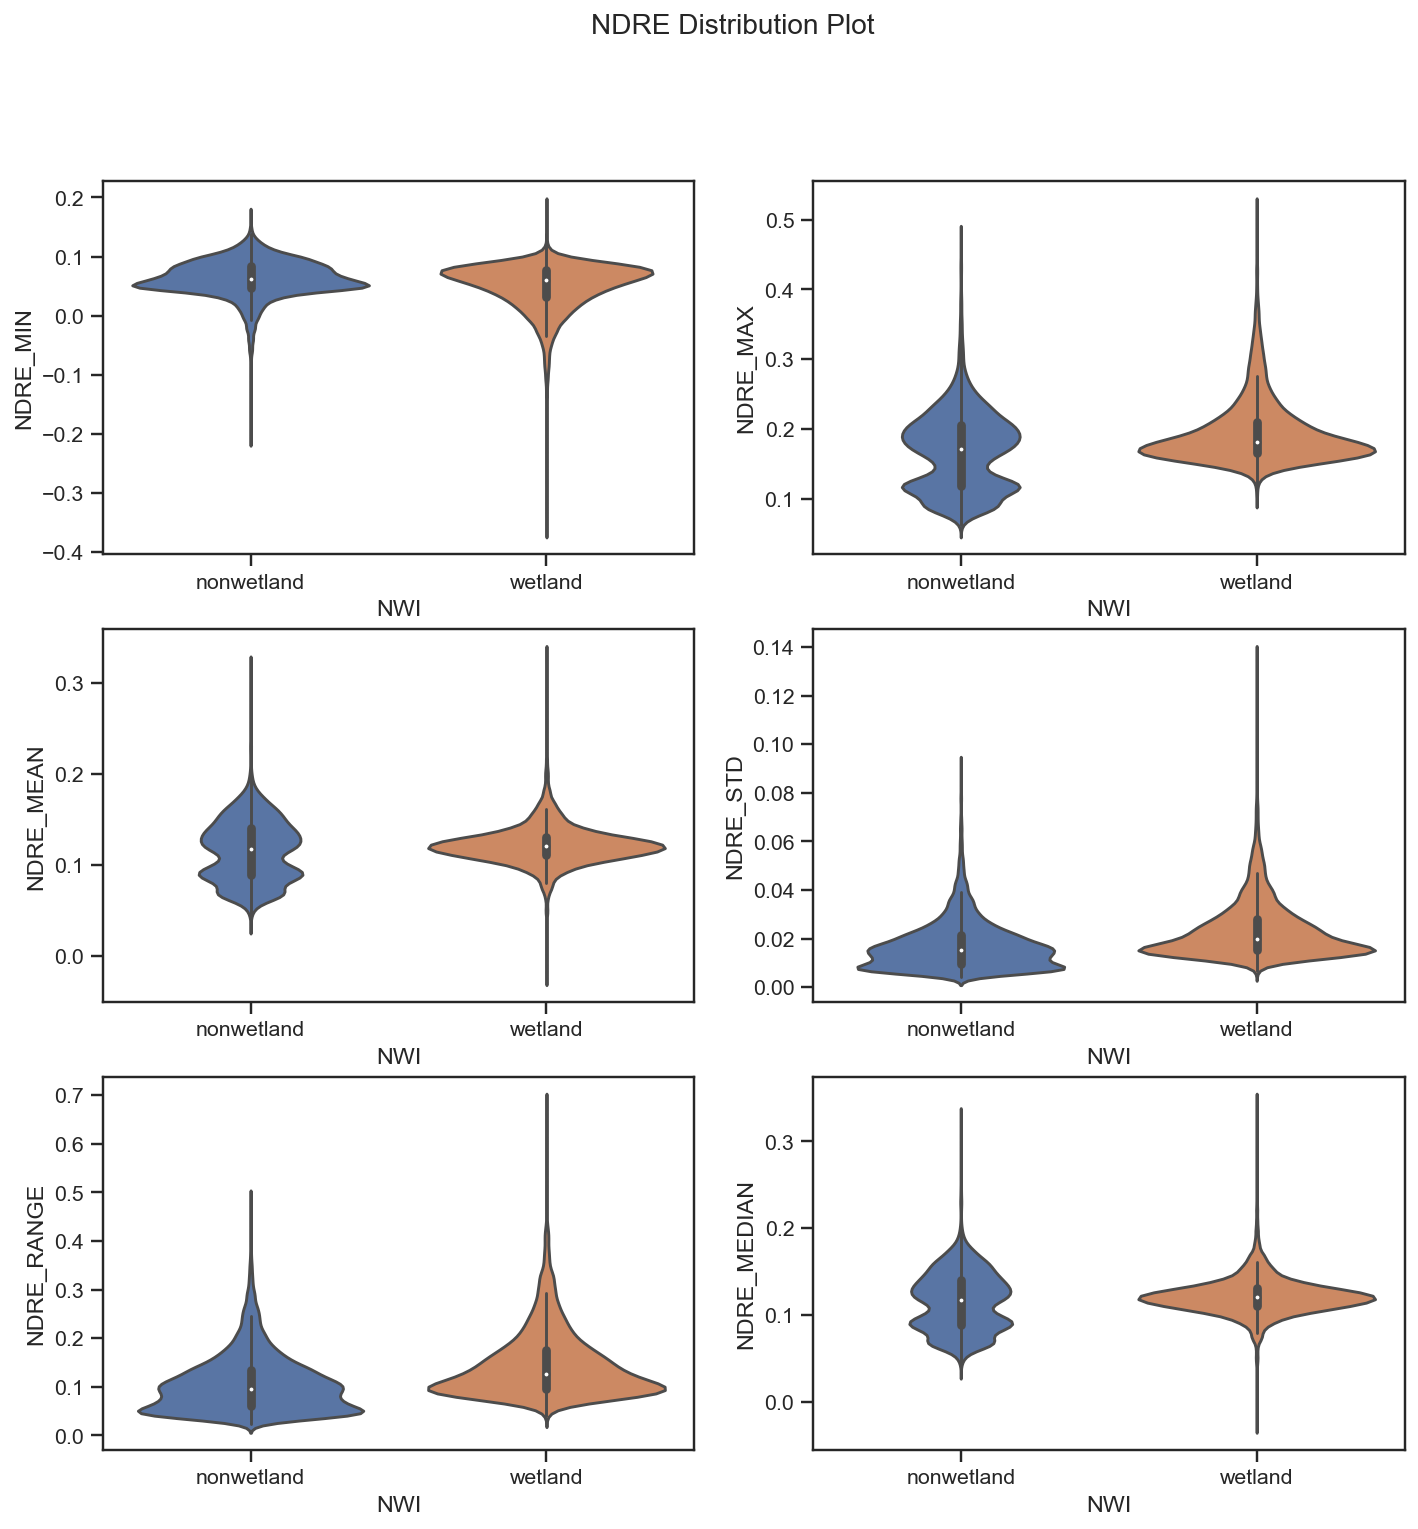

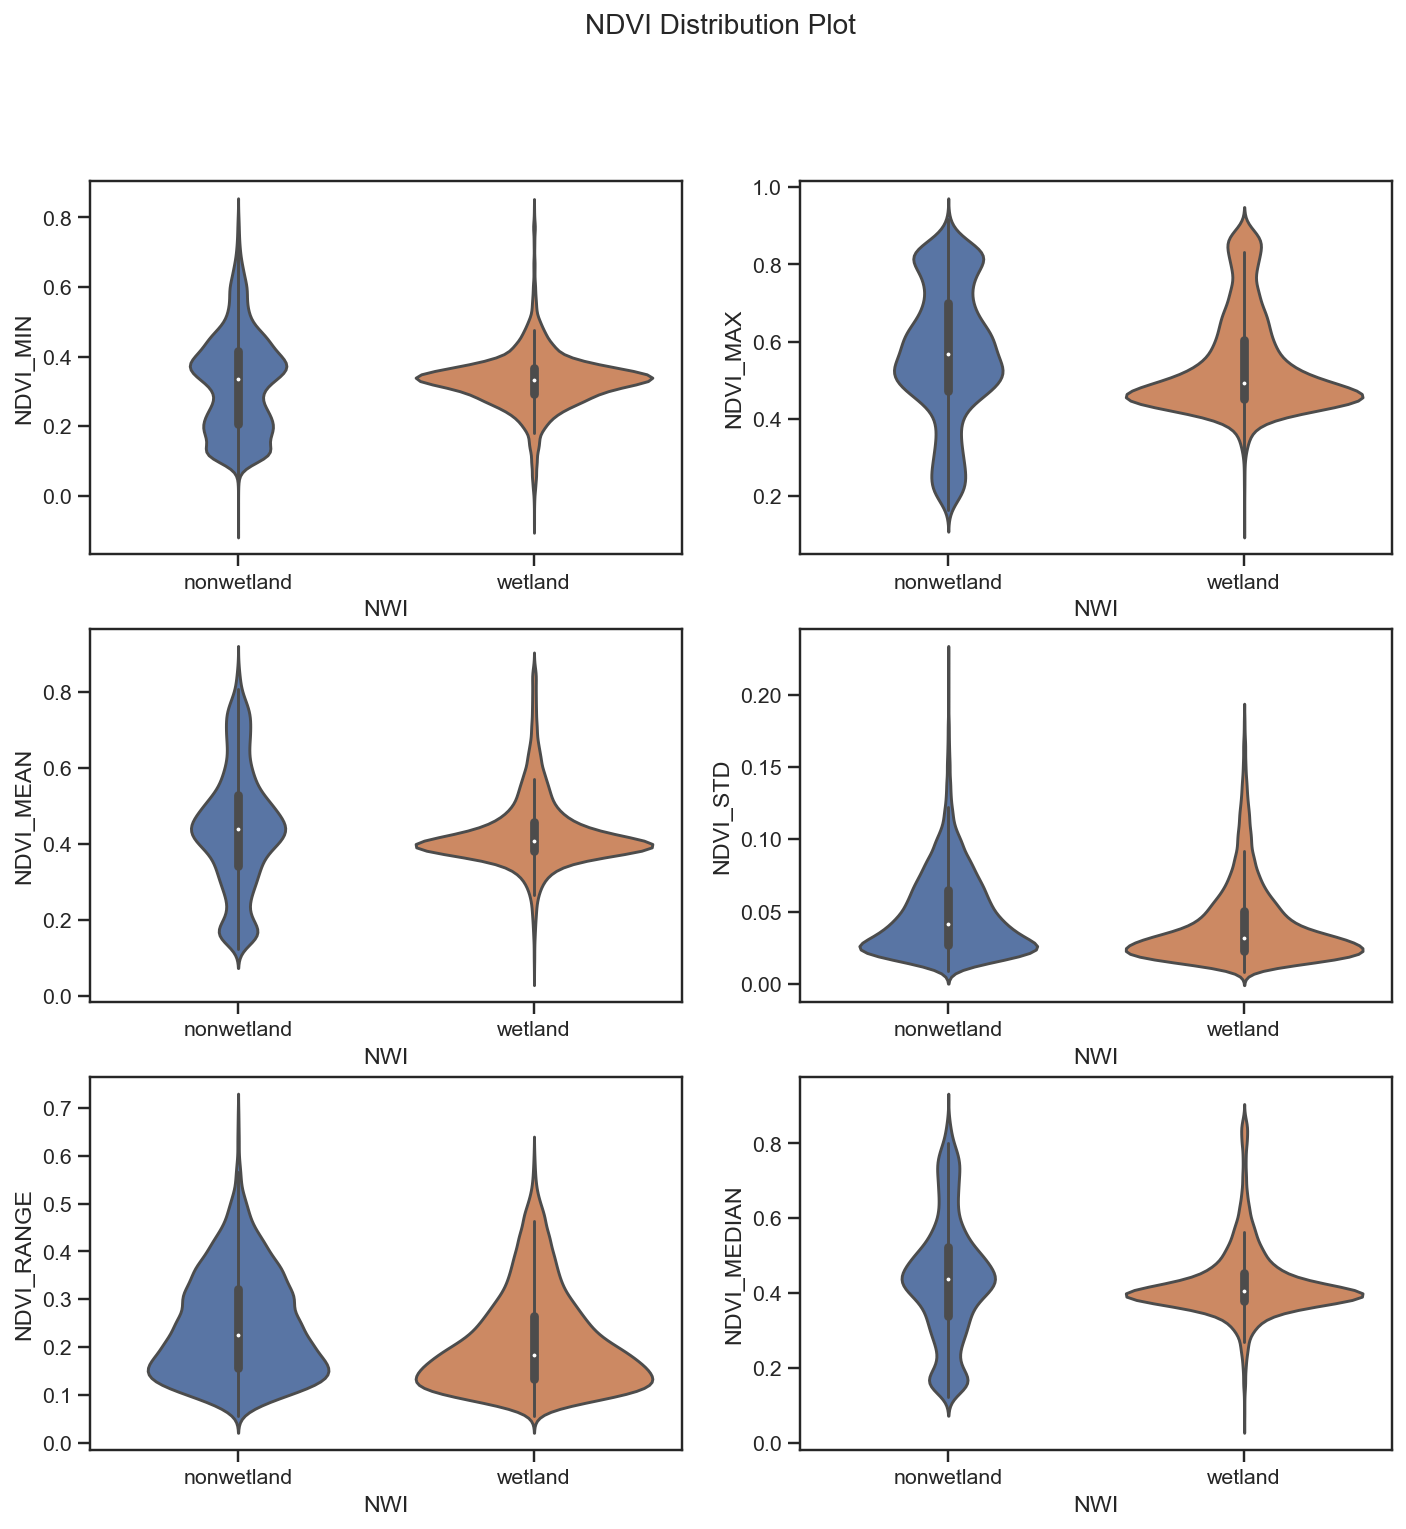

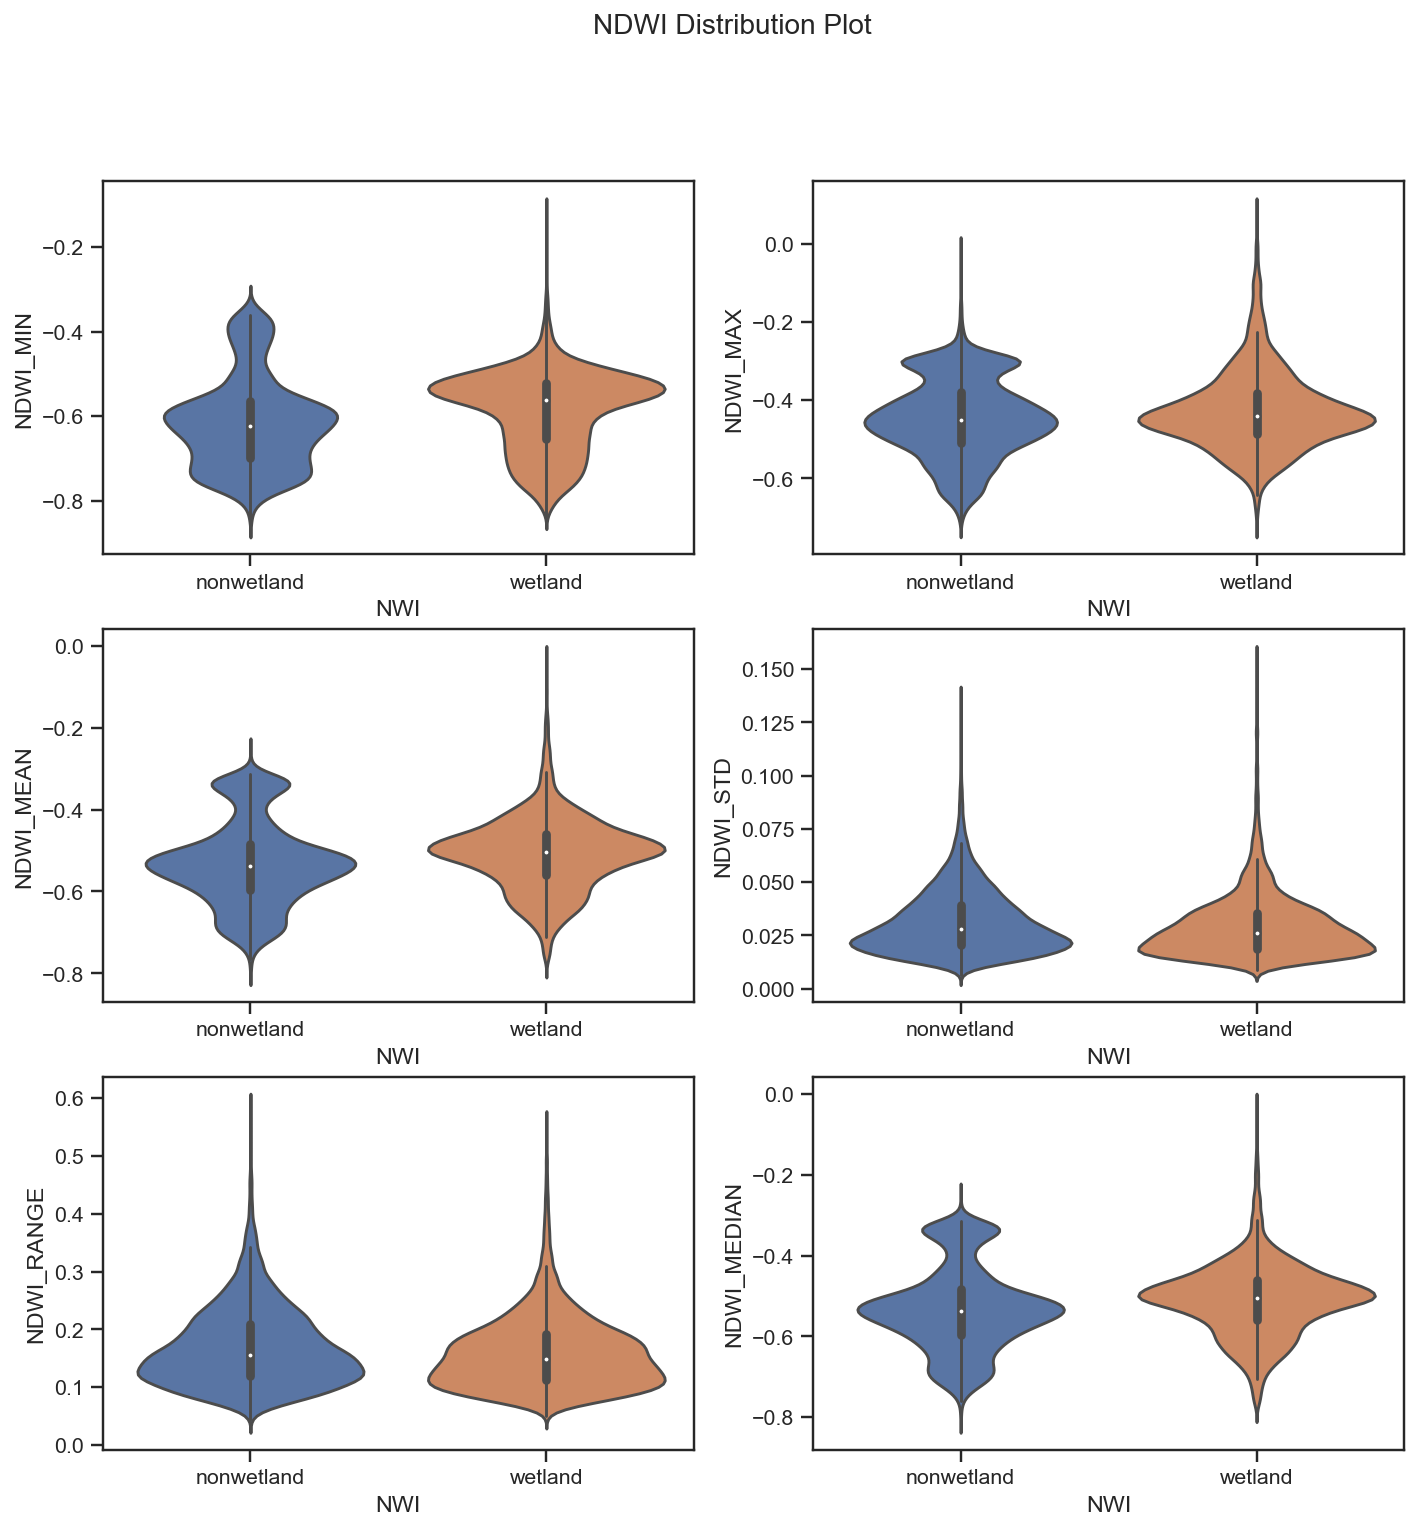

In [8]:
for(columnName, columnData) in dfes.iteritems():
    if("MIN" in columnName):
        columnName = columnName.split('_')[0]
        g = vplt(columnName)
        g.savefig(f'../Images/ViolinPlots/{columnName}ViolinPlot.jpg')